In [1]:
import pandas as pd

df = pd.read_csv('data.csv')
df.drop(columns=['CUST_ID', 'TENURE'], inplace=True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [2]:
missing = df.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [3]:
df.fillna(df.median(), inplace=True)

missing = df.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [4]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(df.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [6]:
from sklearn import metrics

labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')

print(silhouette)

0.34864676031970493


## Validation metrics



### Compression Criteria

The internal metrics are based on two validation criteria, the first of which is compression, which tells us how close the points are in the same cluster. The closer the points, the more compacted it is.


### Separation Criteria

The second validation criterion is separation, which indicates how well separated the points are in different clusters. The idea is just the opposite of compaction, the more distant the clusters are from each other, the better.

## Silhouette coefficient

We have the formula for calculating the coefficient that is based on two main values: beta and alpha.


<img src="imgs/silhouette-coefficient.png" style="width: 300px"/>

We will start by calculating the alpha value, that is, the average distance between the point and all other points in the same cluster. Let's check the compression of the elements.

We will use the same example of the three clusters, and each contains three elements.

<img src="imgs/compaction.png" style="width: 300px"/>

We will be based on two dimensions (x, y), and we will use two attributes of the 16 that we have available in our dataframe.

We will select a specific point, a customer, and from there we will calculate the average for other elements of the cluster. We will call this first point "A".

For the x-axis we will use the value of 1.0 and for y 0.9. That done, we will measure the distance from point "A" to point "B" and "C"

<img src="imgs/graphic.png" style="width: 300px"/>

We are using Euclidean distance, so we will use our formula.

<img src="imgs/distance.png" style="width: 300px"/>

The result of the calculations will be 0.8. This is the Euclidean distance between A and B. We will do the same procedure for C. The distance between point A and C is 1.12.

Once this is done, we will obtain the average between the two final values, the result is 0.96. We will go back to the formula for the silhoette coefficient that we presented at the beginning of the class and insert this value in the alpha variable.

Our next step is to calculate the beta value, which is the average distance between the point and all other points in the nearest cluster.

In order to know which is the closest cluster, we must take the average between the points for the two clusters and collect the lowest value. We will do the same procedure as we did previously, but with different points.

<img src="imgs/new-points.png" style="width: 300px"/>

we will arrive at the final result of 3.1 from point A of the red cluster points. For the yellow cluster the result will be 1.31. The shortest distance is the second cluster, as we can see.

<img src="imgs/formula.png" style="width: 300px"/>

The final result will be 0.26. The result is always between 1 and -1, so in this case we have a good positive value.

In [7]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.1524493491552028


In [8]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3422.837369713755


## Validation

### Relative validation

In [11]:
# Compares the different calculations (Silhouette, dbs, calinski)

def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)

    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [12]:
s1, dbs1, calinski1 = clustering_algorithm(3, values) # values is the normalized df

print(s1, dbs1, calinski)

0.3272203126696238 1.3096073640088428 3526.440519908274


In [23]:
s2, dbs2, calinski2 = clustering_algorithm(5, values) # values is the normalized df

print(s2, dbs2, calinski2)

0.3644787008042783 1.076069787580438 3431.7731363477315


In [14]:
s3, db3, calinski3 = clustering_algorithm(10, values) # values is the normalized df

print(s3, db3, calinski3)

0.35143698069310725 1.1159246803657867 3019.1989463389273


### Cluster Structure Validation

In [24]:
# Simulating a random distribution based on our dataset to validate our cluster structure
import numpy as np

rows, columns = df.shape
random_data = np.random.rand(rows, columns)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2) # The best results from our previous tests


0.03992373475236142 3.489642008625789 303.30504617018784
0.3644787008042783 1.076069787580438 3431.7731363477315


### Stability Cluster Validation

In [25]:
#Tests the stability of our clustering outcome by splitting our dataset and comparing the results

set1, set2, set3 = np.array_split(values, 3)
s_1, dbs_1, calinski_1 = clustering_algorithm(5, set1)
s_2, dbs_2, calinski_2 = clustering_algorithm(5, set2)
s_3, dbs_3, calinski_3 = clustering_algorithm(5, set3)

print(s_1, dbs_1, calinski_1)
print(s_2, dbs_2, calinski_2)
print(s_3, dbs_3, calinski_3)

0.36908155221853267 1.0580445685596034 1204.0558494933457
0.35416642754504823 1.1382306445993162 1194.951986504888
0.3668526924447457 1.0988027839846315 1167.5299723518192


<function matplotlib.pyplot.show(*args, **kw)>

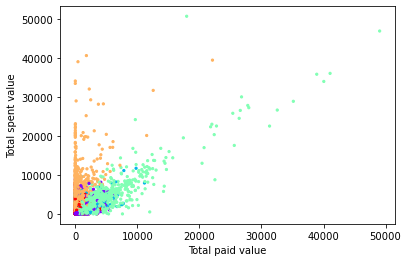

In [37]:
import matplotlib.pyplot as plt

plt.scatter(df['PURCHASES'], df['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Total paid value')
plt.ylabel('Total spent value')
plt.show


In [ ]:
# Makes the pairplot of all variables

import seaborn as sns

df['cluster'] = labels
# Uncomment to run it, but have in mind that this will take a long time do finish
# sns.pairplot(df[0:], hue='cluster')

In [43]:
df.groupby("cluster").describe()

BALANCE                                                     \
          count         mean          std         min          25%   
cluster                                                              
0        3315.0   488.802028   936.433585    0.000000    24.078900   
1        1827.0  2951.097009  2565.123587  114.523682  1218.404312   
2        1494.0  1118.998658  1627.007380    0.000000   212.520398   
3        1001.0  1748.854674  1987.975020    0.000000   486.170360   
4        1313.0  2717.158589  2230.144340    1.691842  1033.498736   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          85.881798   448.965814   9630.367575            3315.0  0.780972   
1        1845.113513  4023.764135  18495.558550            1827.0  0.996863   
2         543.237203  1337.212684  19043.138560            1494.0  0.931343   
3        1060.422892  2241.092286  14581.459140            1001.0  0.858535   
4        2080.122570  3776.150532  12856.152510            1313.0  0.906748   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       260.172137   3933.230932           3315.0  0.244951   
1        ...      1961.072278  76406.207520           1827.0  0.001061   
2        ...       531.787024  18621.013310           1494.0  0.282392   
3        ...       931.105425  21235.065300           1001.0  0.129974   
4        ...      1162.586801   8644.138069           1313.0  0.007461   

                                                           
              std  min  25%       50%       75%       max  
cluster                                                    
0        0.345886  0.0  0.0  0.000000  0.436507  1.000000  
1        0.013393  0.0  0.0  0.000000  0.000000  0.416667  
2        0.369194  0.0  0.0  0.083333  0.567461  1.000000  
3        0.198876  0.0  0.0  0.083333  0.166667  1.000000  
4        0.041172  0.0  0.0  0.000000  0.000000  0.600000  

[5 rows x 128 columns]

In [44]:
centroids = kmeans.cluster_centers_
print(centroids)

[[7.41435057e-02 2.30598606e-04 1.22644337e-01 4.91336388e-02
  7.36112623e-02 2.02012160e-02 1.72105136e-04 3.41056055e-05
  1.39398511e-04 7.56585643e-06 1.18718703e-04 2.87194118e-03
  9.43090102e-01 1.54954100e-01 5.72048927e-02 7.55013476e-05]
 [5.34741672e-01 3.07202985e-04 9.38601858e-02 4.49713524e-02
  4.90037218e-02 8.45065873e-02 1.03399826e-04 3.28191672e-05
  7.68979627e-05 3.86045215e-05 6.71029031e-04 2.23713514e-03
  6.47723980e-01 1.99855833e-01 3.10952081e-01 2.85107727e-07]
 [1.55441288e-01 2.45527380e-04 4.45197805e-01 2.57865614e-01
  1.87505775e-01 2.67051319e-02 2.04941957e-04 8.80988885e-05
  1.51947090e-04 9.54095447e-06 1.73998170e-04 6.18672007e-03
  5.94079088e-01 4.02613545e-01 9.25336034e-02 7.27583477e-05]
 [2.27283461e-01 2.12919599e-04 6.90552841e-02 3.82103280e-02
  3.08505405e-02 3.64415621e-01 5.84848743e-05 2.24756747e-05
  3.97948056e-05 5.90776324e-05 1.43098394e-03 1.30916105e-03
  5.19057140e-01 6.31517578e-01 1.13827521e-01 3.10899781e-05]
 [3.

In [96]:
max = len(centroids[0])

# Calculates the variance
for i in range(max):
    print(df.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0276
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0219
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0037
CASH_ADVANCE 
0.0351
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0210
PAYMENTS 
0.0348
MINIMUM_PAYMENTS 
0.0078
PRC_FULL_PAYMENT 
0.0000


BALANCE 
0.0276

PURCHASES 
0.0219

CASH_ADVANCE 
0.0351

CREDIT_LIMIT 
0.0210

PAYMENTS 
0.0348


In [59]:
description = df.groupby('cluster')['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']

n_clients = description.size()

description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         488.802028   640.242015    126.097601   5178.415315   827.711487   
1        2951.097009   559.113793    575.141750   3732.211275  1050.537627   
2        1118.998658  3328.438133    186.010928   4044.718977  3050.885706   
3        1748.854674   531.250120   3064.439069   3914.956256  4961.223005   
4        2717.158589   251.570556   3005.860698   4780.616908  1008.556115   

         n_clients  
cluster             
0             3315  
1             1827  
2             1494  
3             1001  
4             1313  
<ipython-input-59-5de8706fd27a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df.groupby('cluster')['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']


CLUSTER 0: Customers who spend little. Customers with the highest limit. Good payers. Greater number of customers.

CLUSTER 1: Customers who spend the most. Their focus is withdrawal. Worst payers. Good amount of customers.

CLUSTER 2: Customers who spend a lot on purchases. Best payers.

CLUSTER 3: Customers who spend a lot on withdrawals. They pay sometimes.

CLUSTER 4: Customers with the lowest limit. They are not good payers. Less number of customers

In [56]:
df.groupby('cluster')["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3315.0,0.244951,0.345886,0.0,0.0,0.000000,0.436507,1.000000
1,1827.0,0.001061,0.013393,0.0,0.0,0.000000,0.000000,0.416667
2,1494.0,0.282392,0.369194,0.0,0.0,0.083333,0.567461,1.000000
3,1001.0,0.129974,0.198876,0.0,0.0,0.083333,0.166667,1.000000
4,1313.0,0.007461,0.041172,0.0,0.0,0.000000,0.000000,0.600000
